In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from PIL import Image

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.options.mode.use_inf_as_na = True

In [59]:
# function to create images, takes a df, height and width and returns an array of h x w images for each row in the df
def reshape_as_image(x, h, w):
    x_temp = np.zeros( (len(x), h, w))
    for i in range(len(x)):
        x_temp[i] = np.reshape(x[i], (h, w))
    return x_temp

In [81]:
batch_num = 1
df = pd.read_csv(f"./indicator_batches/batch_{str(batch_num)}_indicators", index_col=0, nrows=10030)
df.dropna(inplace=True)

df = df.reset_index(drop=True)
df.head()

,time,open,close,high,low,volume,label,SMA_6,SMA_7,SMA_8,SMA_9,SMA_10,SMA_11,SMA_12,SMA_13,SMA_14,SMA_15,SMA_16,SMA_17,SMA_18,EMA_6,EMA_7,EMA_8,EMA_9,EMA_10,EMA_11,EMA_12,EMA_13,EMA_14,EMA_15,EMA_16,EMA_17,EMA_18,WMA_6,WMA_7,WMA_8,WMA_9,WMA_10,WMA_11,WMA_12,WMA_13,WMA_14,WMA_15,WMA_16,WMA_17,WMA_18,HMA_6,HMA_7,HMA_8,HMA_9,HMA_10,HMA_11,HMA_12,HMA_13,HMA_14,HMA_15,HMA_16,HMA_17,HMA_18,TEMA_6,TEMA_7,TEMA_8,TEMA_9,TEMA_10,TEMA_11,TEMA_12,TEMA_13,TEMA_14,TEMA_15,TEMA_16,TEMA_17,TEMA_18,RSI_6,RSI_7,RSI_8,RSI_9,RSI_10,RSI_11,RSI_12,RSI_13,RSI_14,RSI_15,RSI_16,RSI_17,RSI_18,williamsR_6,williamsR_7,williamsR_8,williamsR_9,williamsR_10,williamsR_11,williamsR_12,williamsR_13,williamsR_14,williamsR_15,williamsR_16,williamsR_17,williamsR_18,CCI_6,CCI_7,CCI_8,CCI_9,CCI_10,CCI_11,CCI_12,CCI_13,CCI_14,CCI_15,CCI_16,CCI_17,CCI_18,CMO_6,CMO_7,CMO_8,CMO_9,CMO_10,CMO_11,CMO_12,CMO_13,CMO_14,CMO_15,CMO_16,CMO_17,CMO_18,MACD_dif_6,MACD_dif_7,MACD_dif_8,MACD_dif_9,MACD_dif_10,MACD_dif_11,MACD_dif_12,MACD_dif_13,MACD_dif_14,MACD_dif_15,MACD_dif_16,MACD_dif_17,MACD_dif_18,PPO_dif_6,PPO_dif_7,PPO_dif_8,PPO_dif_9,PPO_dif_10,PPO_dif_11,PPO_dif_12,PPO_dif_13,PPO_dif_14,PPO_dif_15,PPO_dif_16,PPO_dif_17,PPO_dif_18,ROC_6,ROC_7,ROC_8,ROC_9,ROC_10,ROC_11,ROC_12,ROC_13,ROC_14,ROC_15,ROC_16,ROC_17,ROC_18,stoch_os_6,stoch_os_7,stoch_os_8,stoch_os_9,stoch_os_10,stoch_os_11,stoch_os_12,stoch_os_13,stoch_os_14,stoch_os_15,stoch_os_16,stoch_os_17,stoch_os_18
0,2014-01-01 09:00:00,744.97,744.97,744.97,744.97,0.038462,0.0,748.063333,748.340000,748.23750,747.863333,747.494,747.197282,746.945008,746.756931,746.595721,746.478673,746.378131,746.289418,746.345561,747.081871,747.136976,747.149938,747.138432,747.113336,747.081250,747.046124,747.010290,746.975088,746.941257,746.909172,746.878988,746.850729,747.330952,747.583214,747.728611,747.755556,747.708000,747.622880,747.518592,747.409784,747.301242,747.198421,747.101916,747.011639,746.941525,745.497937,745.308929,746.234278,747.056481,747.739009,747.877558,748.404023,748.541821,748.896662,749.016456,749.325780,749.420476,749.277978,745.796062,746.209924,746.575721,746.878408,747.117131,747.297830,747.428966,747.519311,747.576919,747.608744,747.620582,747.617153,747.602247,8.566722,35.087719,50.446429,53.361345,53.093202,53.327732,51.902803,51.902803,50.512206,50.393076,50.393076,42.310333,49.914041,-97.509579,-97.509579,-97.509579,-97.509579,-81.701445,-81.701445,-81.701445,-81.701445,-81.701445,-81.701445,-81.701445,-81.701445,-81.701445,-94.856314,-106.875510,-111.361489,-89.821263,-70.882571,-59.523092,-51.805238,-47.094518,-42.680990,-40.396411,-38.454634,-36.762925,-39.337607,-82.866557,-29.824561,0.892857,6.722689,6.186403,6.655463,3.805606,3.805606,1.024413,0.786151,0.786151,-15.379335,-0.171918,0.307942,0.301877,0.291322,0.278533,0.264857,0.251089,0.237680,0.224877,0.212798,0.201490,0.190951,0.181156,0.172066,0.041256,0.040444,0.039031,0.037318,0.035487,0.033642,0.031846,0.030130,0.028512,0.026996,0.025584,0.024271,0.023053,-0.535395,-0.670667,-0.341128,0.013425,0.107502,0.099418,0.107502,0.063130,0.063130,0.017453,0.013425,0.013425,-0.311789,46.591326,50.998414,52.173215,54.401600,53.890461,53.427234,52.219381,56.216568,77.959358,79.153572,72.044327,77.272457,77.960276
1,2014-01-01 09:01:00,744.84,744.84,744.84,744.84,0.009309,0.0,747.373333,747.602857,747.90250,747.860000,747.561,747.252727,747.000842,746.783085,746.620007,746.478673,746.376256,746.287653,746.208894,746.440945,746.561706,746.634572,746.675328,746.694941,746.700817,746.697895,746.689448,746.677641,746.663904,746.649179,746.634083,746.619017,746.410000,746.708214,746.973611,747.150889,747.225455,747.230000,747.194745,747.135936,747.067146,746.993587,746.920960,746.850592,746.783045,744.066349,743.783452,744.603389,745.118296,745.934141,745.988822,746.709091,746.800852,747.382504,747.475323,748.294227,748.378767,748.504726,744.824611,745.147609,745.477981,745.783317,746.048916,746.270758,746.450535,746.592590,746.702176,746.784552,746.844540,746.8

In [82]:
df.shape

(10000, 176)

In [90]:
df[df['label'] == 1].iloc[:5, :7]

,time,open,close,high,low,volume,label
58,2014-01-01 10:55:00,735.16,735.00,735.16,735.00,15.000000,1.0
67,2014-01-01 11:11:00,735.50,735.00,735.50,735.00,8.680000,1.0
89,2014-01-01 11:54:00,738.18,736.21,739.00,736.21,23.000000,1.0
118,2014-01-01 13:07:00,740.99,740.99,740.99,740.99,0.001300,1.0
120,2014-01-01 13:12:00,740.99,740.99,740.99,740.99,0.310774,1.0


In [91]:
df[df['label'] == 2].iloc[:5, :7]

,time,open,close,high,low,volume,label
20,2014-01-01 09:45:00,743.51,747.00,747.00,743.51,1.000000,2.0
75,2014-01-01 11:27:00,741.99,743.79,743.79,740.49,23.000000,2.0
99,2014-01-01 12:10:00,742.85,742.85,742.85,742.85,0.751154,2.0
125,2014-01-01 13:20:00,749.00,748.25,749.01,747.56,38.315650,2.0
146,2014-01-01 14:34:00,745.50,748.49,748.49,744.07,25.500000,2.0


In [60]:
# set X_train = to values for al TA indicators
X_train = df.iloc[: , 7:]
# scale data between 0 and 1
min_max = MinMaxScaler()
X_train = min_max.fit_transform(X_train)

# take scaled data and reshape into images
X_transform = reshape_as_image(X_train, 13, 13)


In [ ]:
# create a loop to convert h x w arrays into images and save them
for i in range(len(X_train)):
    # label = df['label'][i].astype(int)
    
    img = Image.fromarray(X_transform[i], 'L')
    
    plt.figure(figsize=(7,7))
    plt.imshow(img, cmap='gray');
    
    img_name = f'batch_{str(batch_num)}_{str(i)}_{label}.jpg'
    img.save(f"./images/batch_{str(batch_num)}/{img_name}")
    
    if i % 10000 == 0:
        print(f'saving image {i}')

## Example of Buy Image

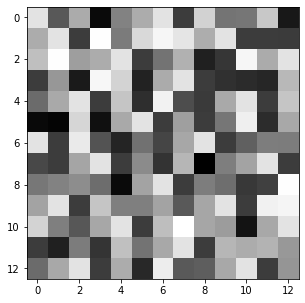

In [52]:
img = Image.fromarray(X_transform[120], 'L')
    
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray');

## Example of Sell Image

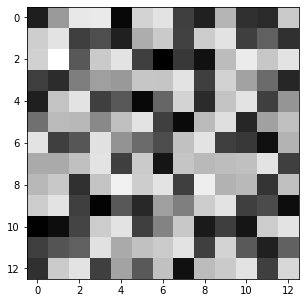

In [53]:
img = Image.fromarray(X_transform[146], 'L')
    
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray');

## Example Hold Image

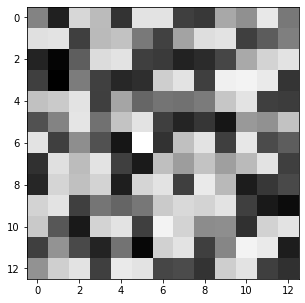

In [54]:
img = Image.fromarray(X_transform[130], 'L')
    
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray');

### Buy = 1, Sell = 2, Hold = 0

In [95]:
df['label'].value_counts()

0.0    9122
2.0     462
1.0     416
Name: label, dtype: int64